# Supermercardo

En contexto, el set de datos a utilizar pertenece al historial de ventas 3 sucursales sucursales diferentes durante 3 meses.

Atributos:

- Invoice id: Numero de factura.
- Branch: lugar del supermercado (3 a,b,c).
- City: ubicación del supermercado.
- Customer type: tipo de clientes (clientes con pago de tarjeta vs pago normal).
- Gender: genero.
- Product line: linea del producto.
- Unit price: precio de cada producto
- Quantity: cantidad de producto en la compra.
- Tax: tasa de imppuesto 5%.
- Total: taotal de la venta con impuesto.
- Date: fecha de compra (enero 2019 a marzo 2019).
- Time: hora de compra.
- Payment: pago utilizado efectivo, tarjeta de crédito y billetera electrónica.
- COGS: costo.
- Gross margin percentage: margen bruto.
- Gross income: ingreso bruto.
- Rating: clasificación del cliente de compra (en la escala del 1 al 10).

# Importar libreria iniciales

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

plt.style.use('fivethirtyeight')
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

%matplotlib notebook

# Cargar dataset

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

In [4]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.shape

(1000, 17)

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [9]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [10]:
df.columns = ["invoice_id",
              "branch",
              "city",
              "customer_type",
              "gender",
              "product_line",
              "unit_price",
              "quantity",
              "tax",
              "total",
              "date",
              "time",
              "payment",
              "cogs",
              "gross_margin_percentage",
              "gross_income",
              "rating"]

In [11]:
df.head()

invoice_id branch       city customer_type  gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             product_line  unit_price  quantity      tax     total       date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    time      payment    cogs  gross_margin_percentage  gross_income  rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

### Analisis entre diferentes variables en base al conjunto de datos

Se traza una relación de pares en un conjunto de datos. La función de pairplot es crea un ejes de modo que cada variable en los datos se compartirá en el eje y en una sola fila y en el eje x en una sola columna.

<IPython.core.display.Javascript object>


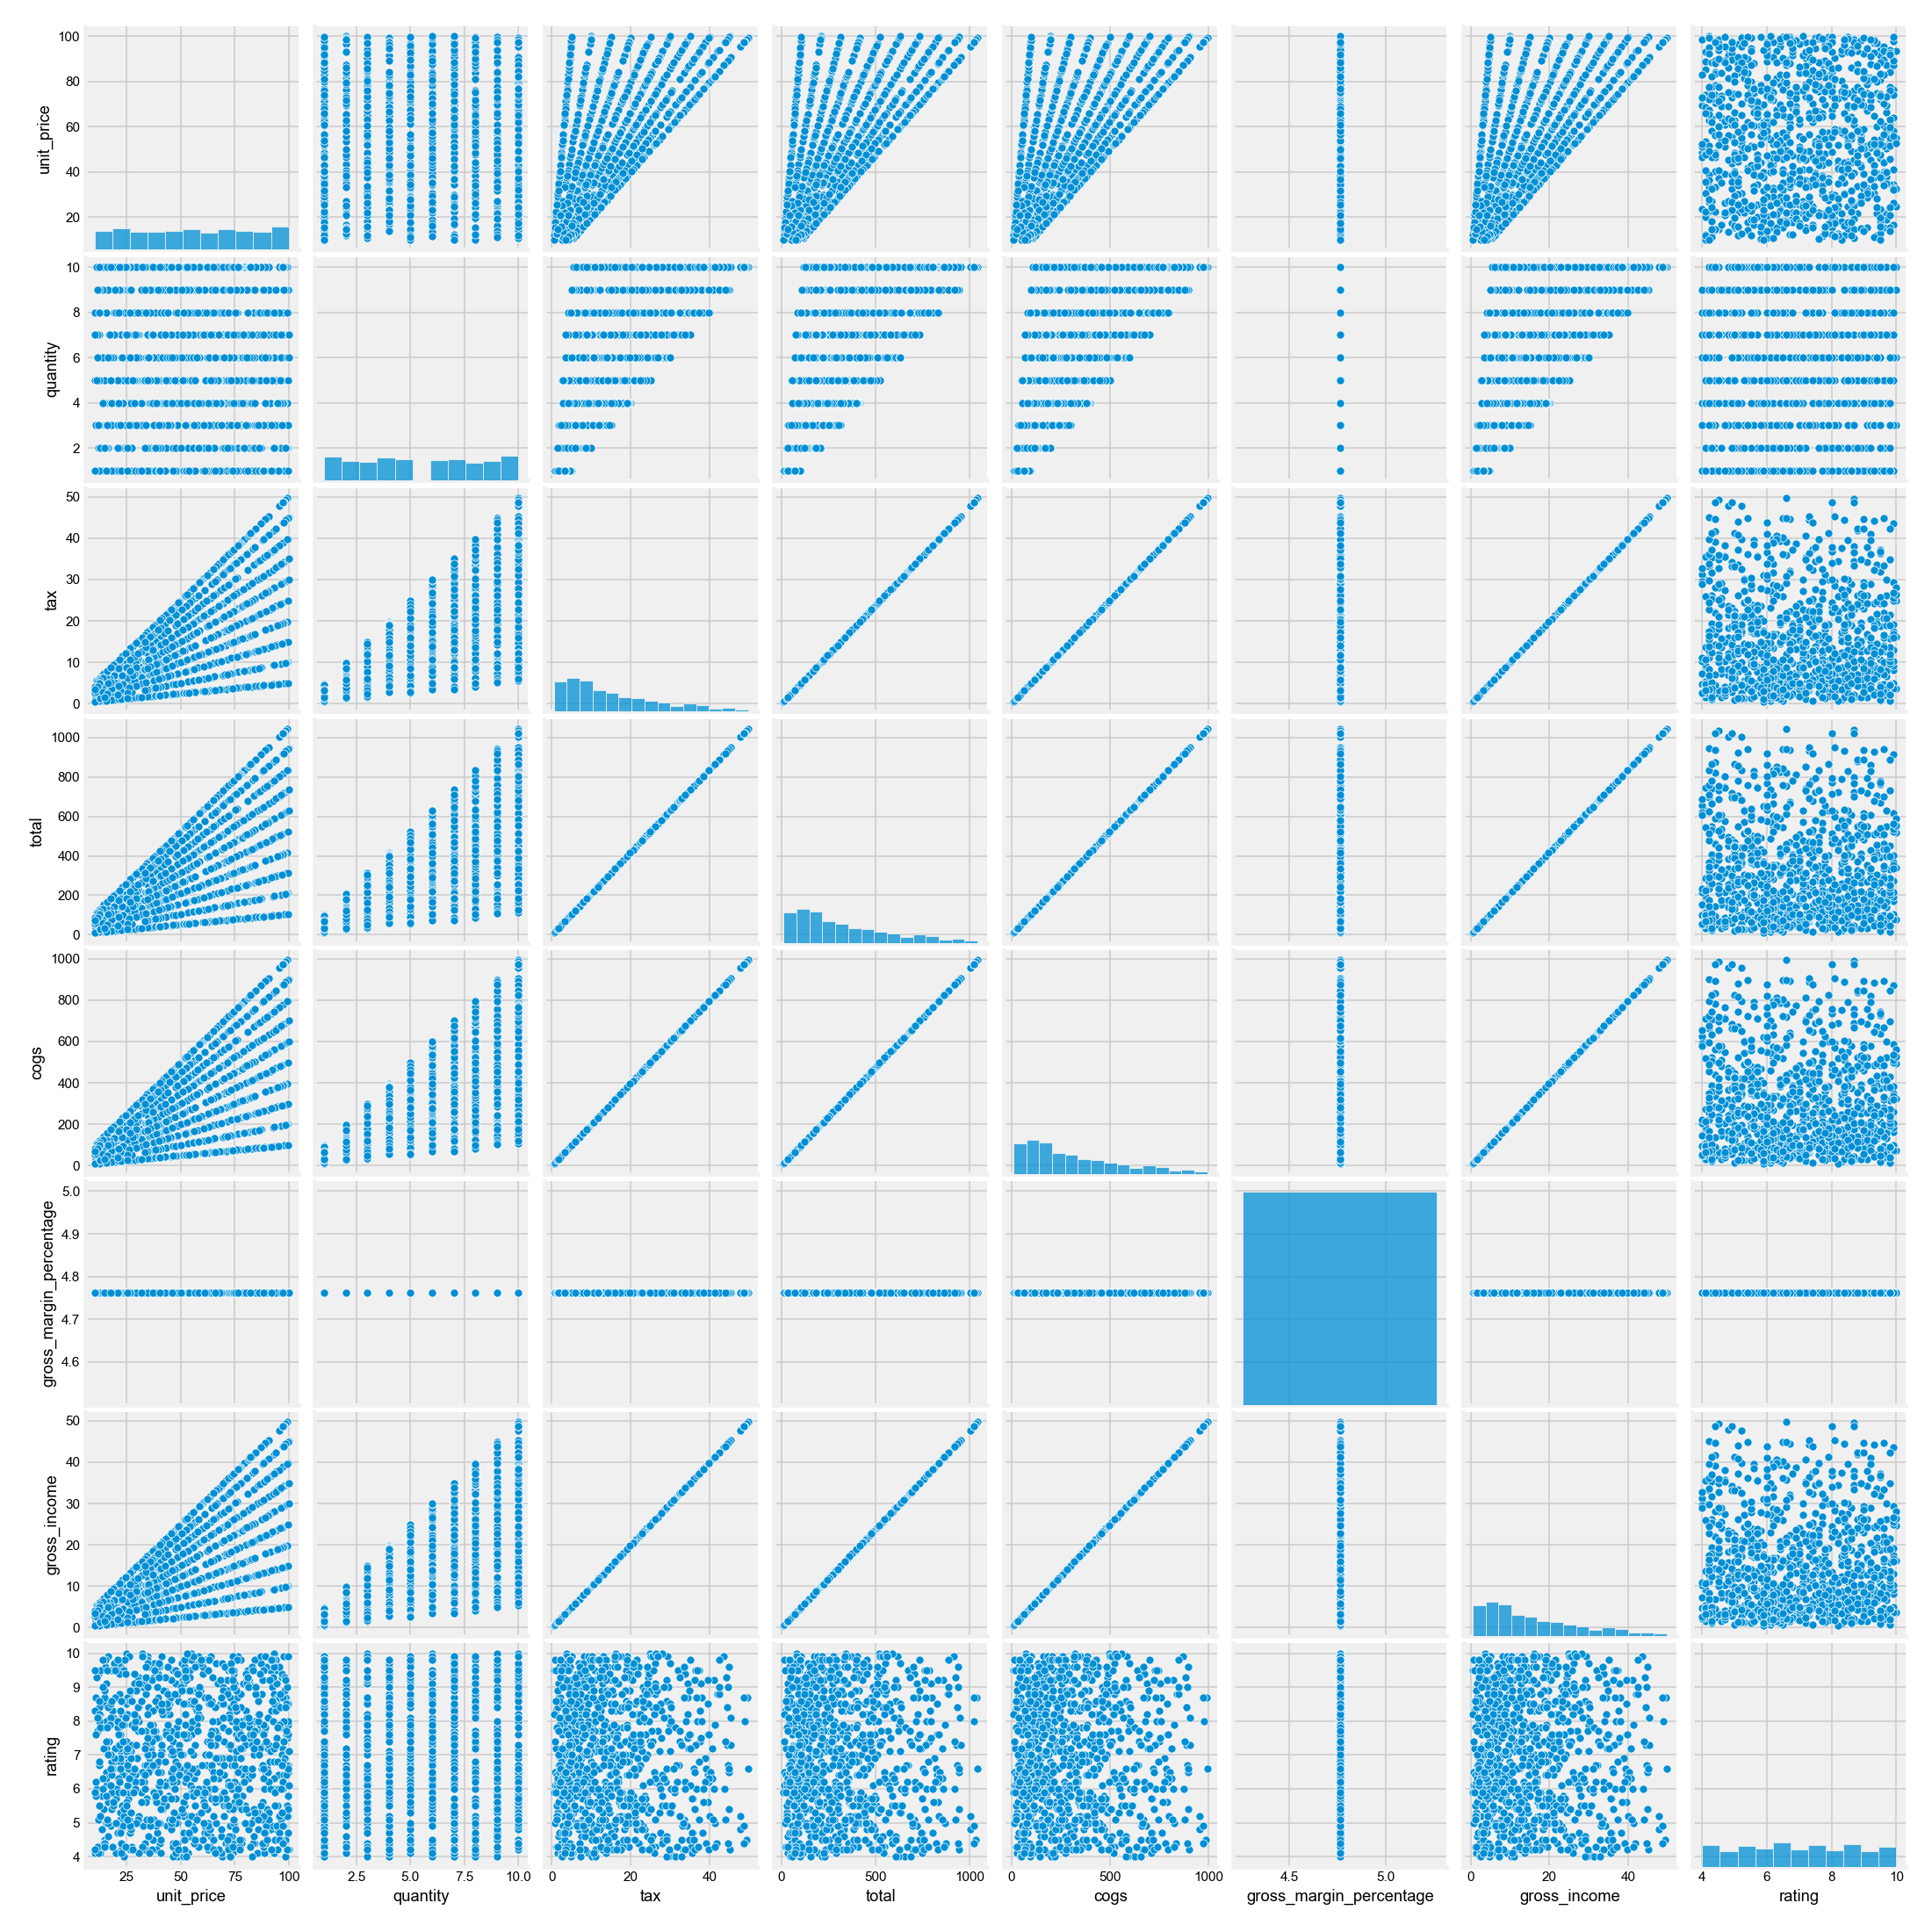

In [12]:
sns.pairplot(df)
plt.show()

Relación entre tipo de cliente y género

<IPython.core.display.Javascript object>


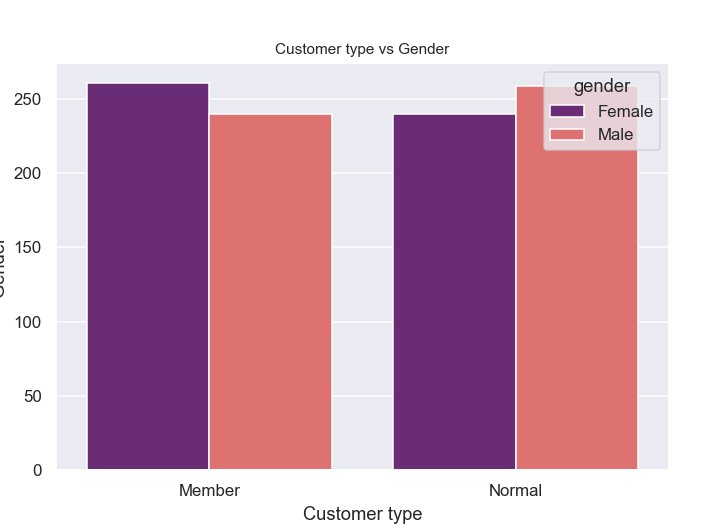

In [13]:
plt.figure()
sns.set_theme()
sns.countplot(data=df, x='customer_type', hue="gender", palette="magma")
plt.title("Customer type vs Gender", fontsize=10)
plt.xlabel("Customer type")
plt.ylabel("Gender")
plt.show()

Relación entre tipo de rating y género

<IPython.core.display.Javascript object>


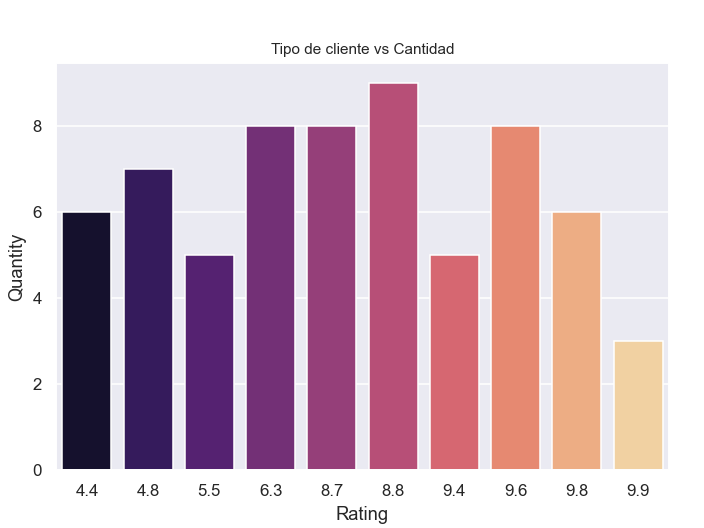

In [14]:
plt.figure()
sns.set_theme()
sns.barplot(x='rating', y="quantity", data=df[170:180], palette="magma")
plt.title("Tipo de cliente vs Cantidad", fontsize=10)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

Precio unitario por cada linea del producto

<IPython.core.display.Javascript object>


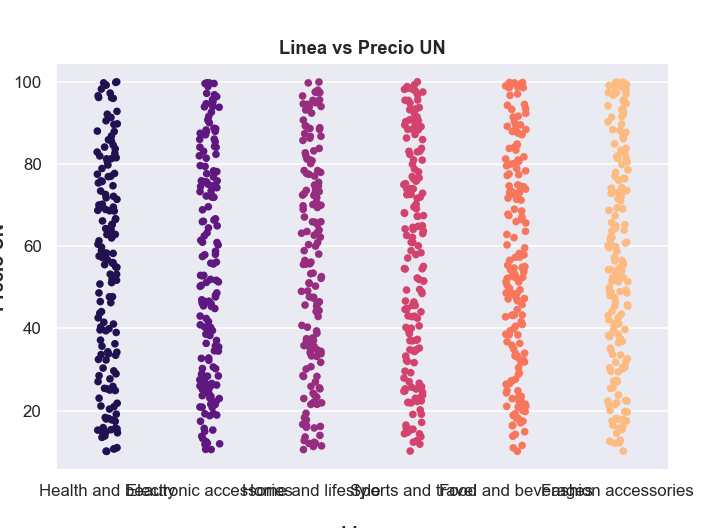

In [15]:
plt.figure()
sns.set_theme()
sns.stripplot(x='product_line', y='unit_price', data = df, palette="magma")
plt.xlabel(" \n Linea", fontweight='bold')
plt.ylabel('Precio UN', fontweight='bold')
plt.title('Linea vs Precio UN', fontweight = 'bold')
plt.show()

# Limpiar y procesar

In [16]:
df.branch.value_counts()

A    340
B    332
C    328
Name: branch, dtype: int64

In [17]:
df.city.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

In [18]:
df.customer_type.value_counts()

Member    501
Normal    499
Name: customer_type, dtype: int64

In [19]:
df.gender.value_counts()

Female    501
Male      499
Name: gender, dtype: int64

In [20]:
df.product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [21]:
df.payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

No se encuentra datos null, pero se realizará la codificación de las variables categóricas encode para la creación de predicción para los modelos entrante.

In [22]:
df["datetime"] = (df["date"] +' '+ df["time"]).apply(lambda x : datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [23]:
df.drop("date", axis=1, inplace=True)
df.drop("time", axis=1, inplace=True)

In [24]:
df.head()

invoice_id branch       city customer_type  gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             product_line  unit_price  quantity      tax     total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

       payment    cogs  gross_margin_percentage  gross_income  rating  \
0      Ewallet  522.83                 4.761905       26.1415     9.1   
1         Cash   76.40                 4.761905        3.8200     9.6   
2  Credit card  324.31                 4.761905       16.2155     7.4   
3      Ewallet  465.76                 4.761905       23.2880     8.4   
4      Ewallet  604.17                 4.761905       30.2085     5.3   

             datetime  
0 2019-01-05 13:08:00  
1 2019-03-08 10:29:00  
2 2019-03-03 13:23:00  
3 2019-01-27 20:33:00  
4 2019-02-08 10:37:00

In [25]:
df = df.set_index("datetime")

In [26]:
df.head()

invoice_id branch       city customer_type  gender  \
datetime                                                                   
2019-01-05 13:08:00  750-67-8428      A     Yangon        Member  Female   
2019-03-08 10:29:00  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03 13:23:00  631-41-3108      A     Yangon        Normal    Male   
2019-01-27 20:33:00  123-19-1176      A     Yangon        Member    Male   
2019-02-08 10:37:00  373-73-7910      A     Yangon        Normal    Male   

                               product_line  unit_price  quantity      tax  \
datetime                                                                     
2019-01-05 13:08:00       Health and beauty       74.69         7  26.1415   
2019-03-08 10:29:00  Electronic accessories       15.28         5   3.8200   
2019-03-03 13:23:00      Home and lifestyle       46.33         7  16.2155   
2019-01-27 20:33:00       Health and beauty       58.22         8  23.2880   
2019-02-08 10:37:00       Sports and travel       86.31         7  30.2085   

                        total      payment    cogs  gross_margin_percentage  \
datetime                                                                      
2019-01-05 13:08:00  548.9715      Ewallet  522.83                 4.761905   
2019-03-08 10:29:00   80.2200         Cash   76.40                 4.761905   
2019-03-03 13:23:00  340.5255  Credit card  324.31                 4.761905   
2019-01-27 20:33:00  489.0480      Ewallet  465.76                 4.761905   
2019-02-08 10:37:00  634.3785      Ewallet  604.17                 4.761905   

                     gross_income  rating  
datetime                                   
2019-01-05 13:08:00       26.1415     9.1  
2019-03-08 10:29:00        3.8200     9.6  
2019-03-03 13:23:00       16.2155     7.4  
2019-01-27 20:33:00       23.2880     8.4  
2019-02-08 10:37:00       30.2085     5.3

In [27]:
# generar maping en la columana genero 0 y 1
df["gender"] = df["gender"].map({"Female" : 0, "Male" : 1})

In [28]:
# convertir datos categoricos tipo string a numeros
_list = list(df.columns)
list_cate = []
for i in _list:
    if df[i].dtype == "object":
        list_cate.append(i)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in list_cate:
    df[i] = le.fit_transform(df[i])

In [29]:
df

invoice_id  branch  city  customer_type  gender  \
datetime                                                               
2019-01-05 13:08:00         814       0     2              0       0   
2019-03-08 10:29:00         142       2     1              1       0   
2019-03-03 13:23:00         653       0     2              1       1   
2019-01-27 20:33:00          18       0     2              0       1   
2019-02-08 10:37:00         339       0     2              1       1   
...                         ...     ...   ...            ...     ...   
2019-01-29 13:46:00         153       2     1              1       1   
2019-03-02 17:16:00         250       1     0              1       0   
2019-02-09 13:22:00         767       0     2              0       1   
2019-02-22 15:33:00         308       0     2              1       1   
2019-02-18 13:28:00         935       0     2              0       0   

                     product_line  unit_price  quantity      tax      total  \
datetime                                                                      
2019-01-05 13:08:00             3       74.69         7  26.1415   548.9715   
2019-03-08 10:29:00             0       15.28         5   3.8200    80.2200   
2019-03-03 13:23:00             4       46.33         7  16.2155   340.5255   
2019-01-27 20:33:00             3       58.22         8  23.2880   489.0480   
2019-02-08 10:37:00             5       86.31         7  30.2085   634.3785   
...                           ...         ...       ...      ...        ...   
2019-01-29 13:46:00             3       40.35         1   2.0175    42.3675   
2019-03-02 17:16:00             4       97.38        10  48.6900  1022.4900   
2019-02-09 13:22:00             2       31.84         1   1.5920    33.4320   
2019-02-22 15:33:00             4       65.82         1   3.2910    69.1110   
2019-02-18 13:28:00             1       88.34         7  30.9190   649.2990   

                     payment    cogs  gross_margin_percentage  gross_income  \
datetime                                                                      
2019-01-05 13:08:00        2  522.83                 4.761905       26.1415   
2019-03-08 10:29:00        0   76.40                 4.761905        3.8200   
2019-03-03 13:23:00        1  324.31                 4.761905       16.2155   
2019-01-27 20:33:00        2  465.76                 4.761905       23.2880   
2019-02-08 10:37:00        2  604.17                 4.761905       30.2085   
...                      ...     ...                      ...           ...   
2019-01-29 13:46:00        2   40.35                 4.761905        2.0175   
2019-03-02 17:16:00        2  973.80                 4.761905       48.6900   
2019-02-09 13:22:00        0   31.84                 4.761905        1.5920   
2019-02-22 15:33:00        0   65.82                 4.761905        3.2910   
2019-02-18 13:28:00        0  618.38                 4.761905       30.9190   

                     rating  
datetime                     
2019-01-05 13:08:00     9.1  
2019-03-08 10:29:00     9.6  
2019-03-03 13:23:00     7.4  
2019-01-27 20:33:00     8.4  
2019-02-08 10:37:00     5.3  
...                     ...  
2019-01-29 13:46:00     6.2  
2019-03-02 17:16:00     4.4  
2019-02-09 13:22:00     7.7  
2019-02-22 15:33:00     4.1  
2019-02-18 13:28:00     6.6  

[1000 rows x 15 columns]

# Training y testing data set

In [30]:
y = df["gender"]
x = df.drop("gender", axis=1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((750, 14), (750,), (250, 14), (250,))

# Modelos

- Accuracy = Cuantas veces predijo correctamente el clasificadores y cuanta predicciones realizo Ej: se realiza 50 direcciones correctamente de un total 100, el punto es 0.5 (es de 0 a 1: 0 = la peor y 1 la mejor)
- Preccision = La precisión es la relación tp / (tp + fp) donde tp es el número de positivos verdaderos y fp el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador para no etiquetar como positiva una muestra que es negativa. Se toma en cuenta los falso positivo, indicando un set que podría estar. Va a capturar ciertos puntos, hasta contemplar los falso positivo.
- Recall = El retiro es la relación tp / (tp + fn) donde tp es el número de verdaderos positivos y fn el número de falsos negativos. El retiro es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas. Se toma en cuenta los falso positivo, pero uno le indica el conjunto de datos. Va capturar a ciertos puntos, hasta visualizar los falso positivo.
- F1 Score = Balance entre preccision y recall.

In [33]:
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def metric (class_r, class_p):
    """ calcular las métricas utilizando sklearn """
#     classification = classification_report(class_r, class_p)
    matriz = confusion_matrix(class_r, class_p)
    accuracy = accuracy_score(class_r, class_p)
    precision = precision_score(class_r, class_p, average='weighted')
    recall = recall_score(class_r, class_p, average='weighted')
    f1 = f1_score(class_r, class_p, average='weighted')
    return matriz, accuracy, precision, recall, f1
    
def view_metric (class_r, class_p):
    matriz, accuracy, precision, recall, f1 = metric(class_r, class_p)
#     Classification, matriz, accuracy, precision, recall, f1 = metric(class_r, class_p)
#     print("Classification reporte :\n", classification)
    print("Matriz reporte:\n", matriz)
    print('Accuracy repote: %.3f' % (float(accuracy)*100),'%')
    print('Precision reporte: %.3f' % (float(precision)*100),'%')
    print('Recall reporte: %.3f' % (float(recall)*100),'%')
    print('F1 reporte: %.3f' % (float(f1)*100),'%')
    
    
    matriz = pd.DataFrame(matriz, columns=["0 : Compra Mujeres", "1 : Compra Hombres"])
    
    # graphic
    plt.matshow(matriz, cmap="Blues")
    plt.title("Predichas")
    plt.ylabel("Reales")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falso\npositivos"),
                ("Falsos\nnegativo", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i,j]),
                    fontsize=12, ha="center", va="center", c="red")
            plt.text(i, j - 0.25, etiquetas[i][j],
                    fontsize=14, ha="center", c="red")
    plt.text(1.60, -0.30, 0.25 ,fontsize=25)
    plt.show()

1. KNeighborsClassifier

**KNeighborsClassifier es un metodo no parametrico para determinar los conjuntos de K vecinos cercanos entre ellos, en lo cual se utilizara K = 10, 8, 6 para clasificar la distancia euclidiana que se encuentre entre los puntos vecinos **

- K = 10

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [35]:
# entrega la predicción sobre el testeo
y_pred = knn.predict(x_test)

Matriz reporte:
 [[80 44]
 [82 44]]
Accuracy repote: 49.600 %
Precision reporte: 49.694 %
Recall reporte: 49.600 %
F1 reporte: 48.473 %


<IPython.core.display.Javascript object>


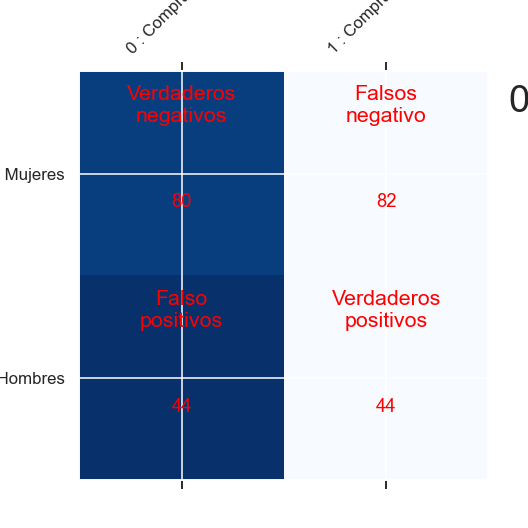

In [36]:
view_metric(y_test,y_pred)

In [37]:
print('Training Score reporte: %.3f' % (float(knn.score(x_train, y_train))*100),'%')

Training Score reporte: 62.400 %


- K = 8

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,  weights='uniform',algorithm='kd_tree')

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [39]:
# entrega la predicción sobre el testeo
y_pred = knn.predict(x_test)

Matriz reporte:
 [[87 37]
 [82 44]]
Accuracy repote: 52.400 %
Precision reporte: 52.912 %
Recall reporte: 52.400 %
F1 reporte: 50.881 %


<IPython.core.display.Javascript object>


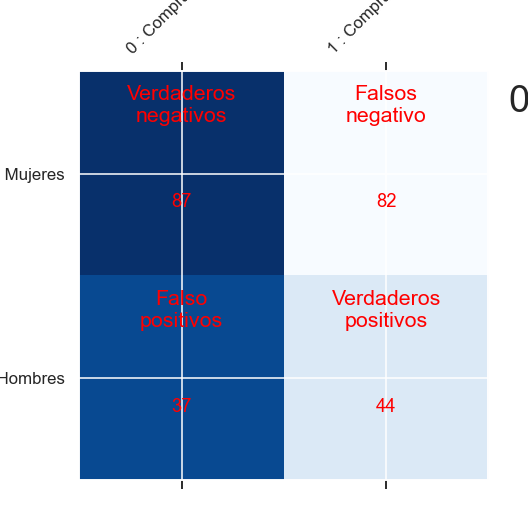

In [40]:
view_metric(y_test,y_pred)

In [41]:
print('Training Score reporte: %.3f' % (float(knn.score(x_train, y_train))*100),'%')

Training Score reporte: 62.800 %


- K = 5

Al realizar el classifier de 6, se puede visualizar una mayor influencia en el resultado a diferencia de los otros 2 modelos, ya que al aumentar este valor su porcentaje de aceptación. Además se puede visualizar que la distribución en el set de entrenamiento se puede decir que un 50 % fueron compra de mujeres y otro % de hombres.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree')

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=6)

In [43]:
# entrega la predicción sobre el testeo
y_pred = knn.predict(x_test)

Matriz reporte:
 [[78 46]
 [82 44]]
Accuracy repote: 48.800 %
Precision reporte: 48.820 %
Recall reporte: 48.800 %
F1 reporte: 47.778 %


<IPython.core.display.Javascript object>


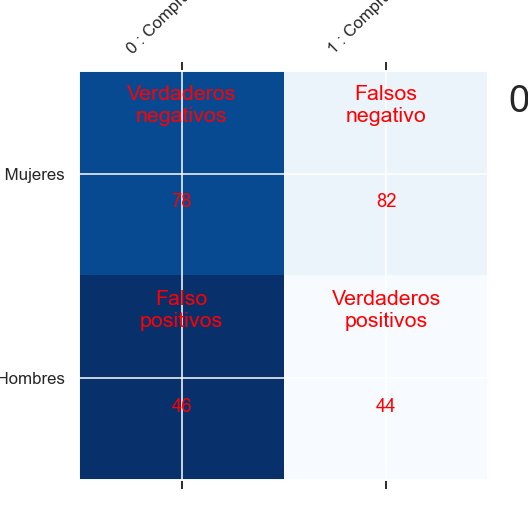

In [44]:
view_metric(y_test,y_pred)

In [45]:
print('Training Score reporte: %.3f' % (float(knn.score(x_train, y_train))*100),'%')

Training Score reporte: 64.267 %


2.- RandomForestClassifier


**Modelo de versatilidad de aprendizaje automático, para realizar la clasificación de los árboles decisión del set de datos para realizar la predicción y controlar el sobre ajuste. En lo cual se usara n = controlado, 10, 15
**

- n_estimators = controlado

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred=rfc.predict(x_test)

Matriz reporte:
 [[66 58]
 [60 66]]
Accuracy repote: 52.800 %
Precision reporte: 52.807 %
Recall reporte: 52.800 %
F1 reporte: 52.800 %


<IPython.core.display.Javascript object>


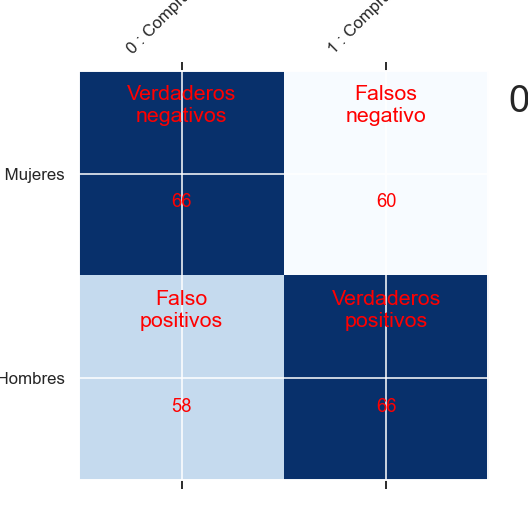

In [48]:
view_metric(y_test,y_pred)

In [49]:
print('Training Score reporte: %.3f' % (float(rfc.score(x_train, y_train))*100),'%')

Training Score reporte: 100.000 %


- n_estimators = 10

Al aplicar él sin restricción (mejor modelo), con el set de datos de test. Se puede visualizar que la configuración aplicable y aceptable, ya que cumple con un 100 % aceptación y su accuracy es de un 50 %. A diferencia del modelo Classifier, diminuye al momento de verificar el modelo de testeo.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [51]:
y_pred=rfc.predict(x_test)

Matriz reporte:
 [[76 48]
 [77 49]]
Accuracy repote: 50.000 %
Precision reporte: 50.098 %
Recall reporte: 50.000 %
F1 reporte: 49.366 %


<IPython.core.display.Javascript object>


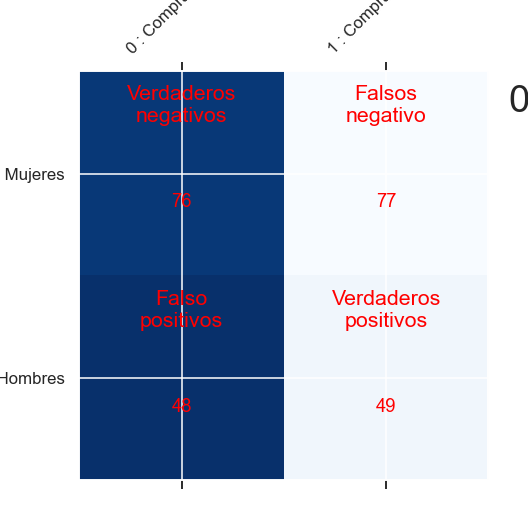

In [52]:
view_metric(y_test,y_pred)

In [53]:
print('Training Score reporte: %.3f' % (float(rfc.score(x_train, y_train))*100),'%')

Training Score reporte: 98.000 %


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [55]:
y_pred=rfc.predict(x_test)

Matriz reporte:
 [[70 54]
 [66 60]]
Accuracy repote: 52.000 %
Precision reporte: 52.056 %
Recall reporte: 52.000 %
F1 reporte: 51.908 %


<IPython.core.display.Javascript object>


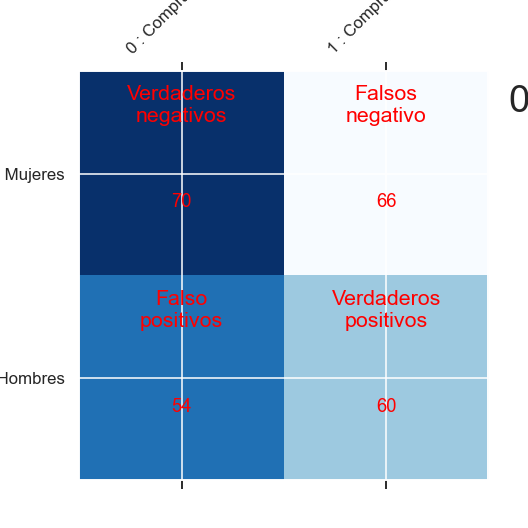

In [56]:
view_metric(y_test,y_pred)

In [57]:
print('Training Score reporte: %.3f' % (float(rfc.score(x_train, y_train))*100),'%')

Training Score reporte: 99.733 %


# Cluster

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [59]:
x = df[["unit_price", "total"]]

In [60]:
z = linkage(df, method='ward')

In [61]:
# coeficiente de correlación cophenetic, va de 0 a 1
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [62]:
c, coph_disth = cophenet(z, pdist(x))

In [63]:
c

0.5588879361418746

In [64]:
np.set_printoptions(precision=5, suppress=True)

In [65]:
z

array([[   90.     ,   284.     ,     4.11339,     2.     ],
       [   94.     ,   504.     ,     4.54551,     2.     ],
       [  861.     ,   922.     ,     4.87529,     2.     ],
       ...,
       [ 1994.     ,  1995.     ,  7074.22036,   411.     ],
       [ 1992.     ,  1993.     ,  8347.40339,   589.     ],
       [ 1996.     ,  1997.     , 12546.28596,  1000.     ]])

<IPython.core.display.Javascript object>


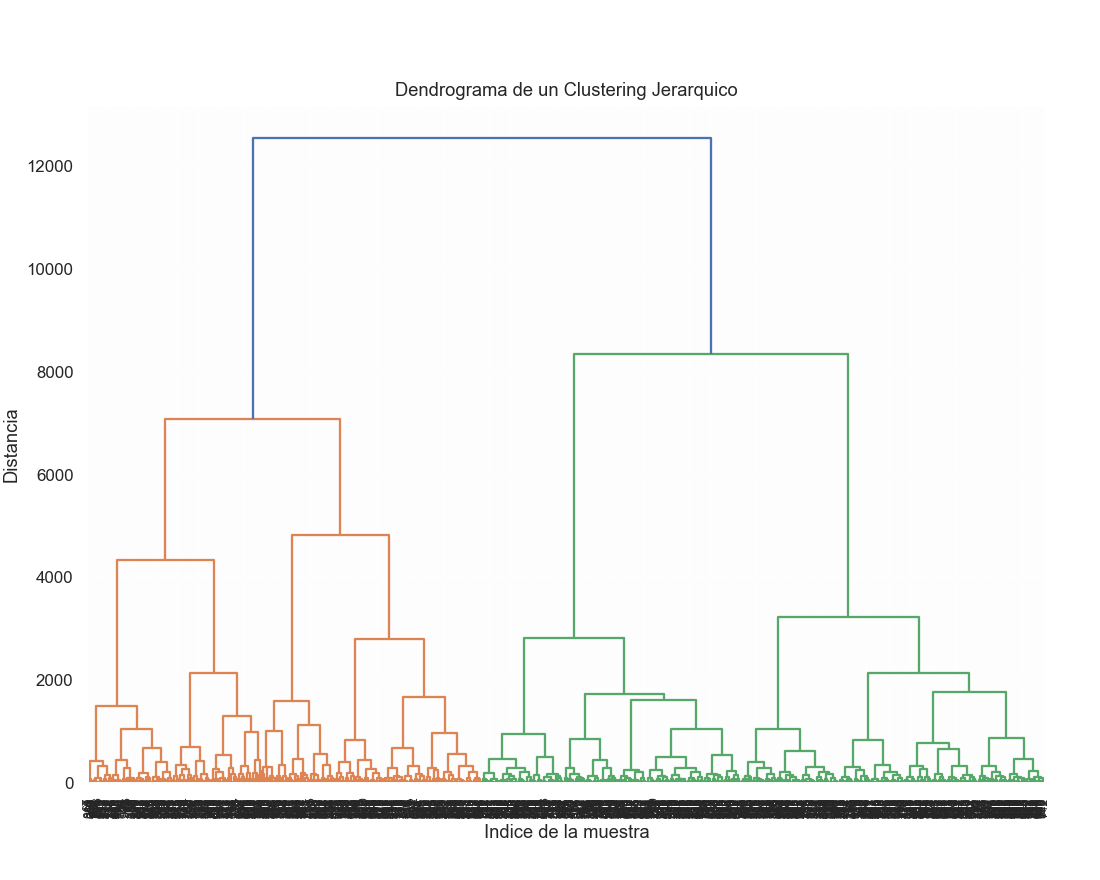

In [66]:
plt.figure(figsize=(10,8))
plt.title('Dendrograma de un Clustering Jerarquico')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancia')
dendrogram(z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

<IPython.core.display.Javascript object>


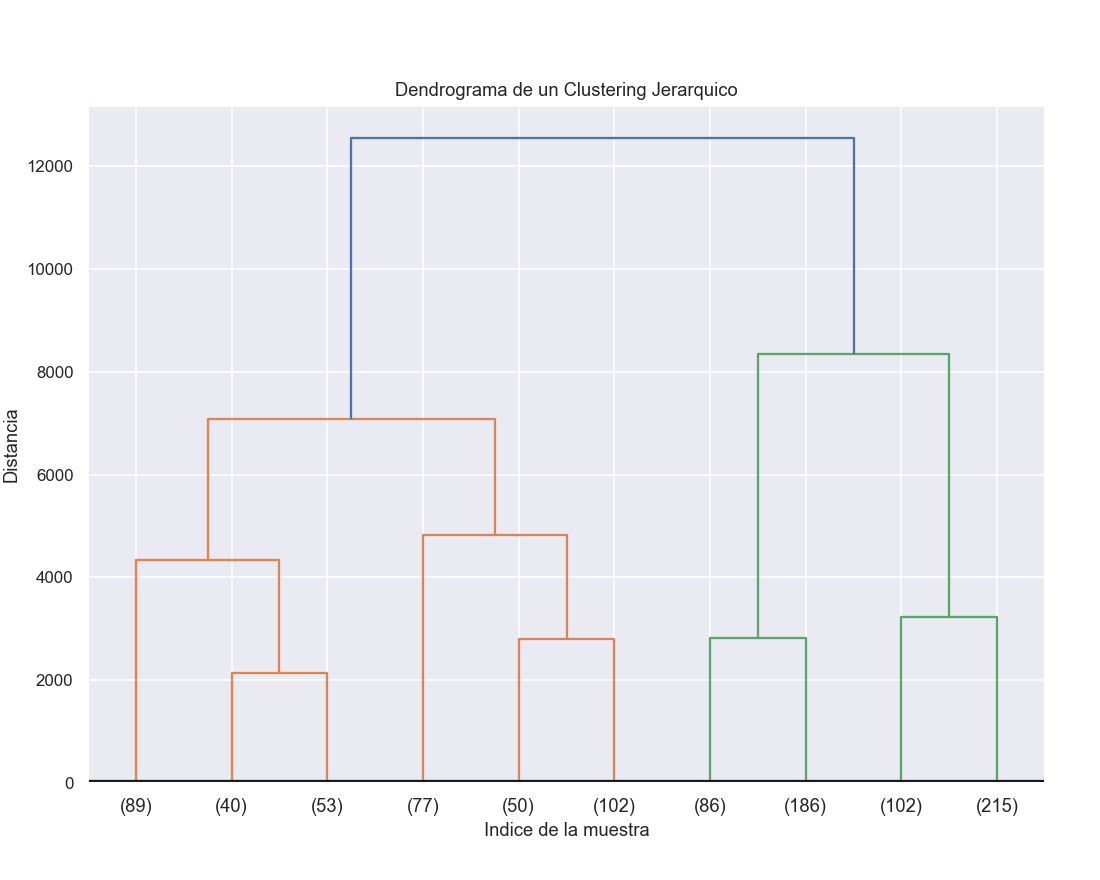

In [67]:
plt.figure(figsize=(10,8))
plt.title('Dendrograma de un Clustering Jerarquico')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancia')
dendrogram(z, truncate_mode='lastp', p=10) # Muestra las ultimas 10 clasteres creado desde arriva hacia abajo
plt.axhline(y=50, c='k')
plt.show()

# Obtener cluster

In [68]:
from scipy.cluster.hierarchy import fcluster

In [69]:
# Fijar la distancias de corte
dist_cut = 5
clusters = fcluster(z, dist_cut, criterion='distance')

In [70]:
clusters

array([291, 755, 341,   7, 103, 234,  41, 161, 475, 588, 844, 463, 928,
        36, 204, 114, 283, 297, 985, 848,  44, 937, 774, 644, 906,  39,
       486, 706,  13, 549, 272, 138, 256, 653,  85, 768,  72, 113,  46,
       535, 777, 438,  42, 154, 417,  82, 120, 595, 496, 224, 107, 684,
       490, 472, 746, 157, 729, 254, 205, 691, 776, 504, 118, 718, 509,
       521, 573,   1, 152, 799, 180, 260, 854, 305, 130, 323,  37, 982,
       200, 609, 268, 510, 852, 501, 929, 232, 383, 343, 797,  49, 923,
        40, 522,   5, 458, 450, 194, 554, 528, 280, 720, 144, 920,  87,
       677, 192, 642, 336, 344, 198, 792,  62,  22, 238, 149, 757, 760,
       480, 495, 836, 216, 340, 178, 119,  38, 251, 524,  63, 236, 222,
        64, 278, 583, 369, 357, 347, 584, 978,  23, 367, 196, 175, 159,
       794,  24, 887, 669, 908, 111,  67, 333, 897, 245, 750, 109, 292,
       779, 942, 197,  99, 497, 781,  74, 872, 410, 393, 179, 189, 517,
        12,  33,  45, 592, 345, 878, 519, 713, 694, 370, 938,  1

<IPython.core.display.Javascript object>


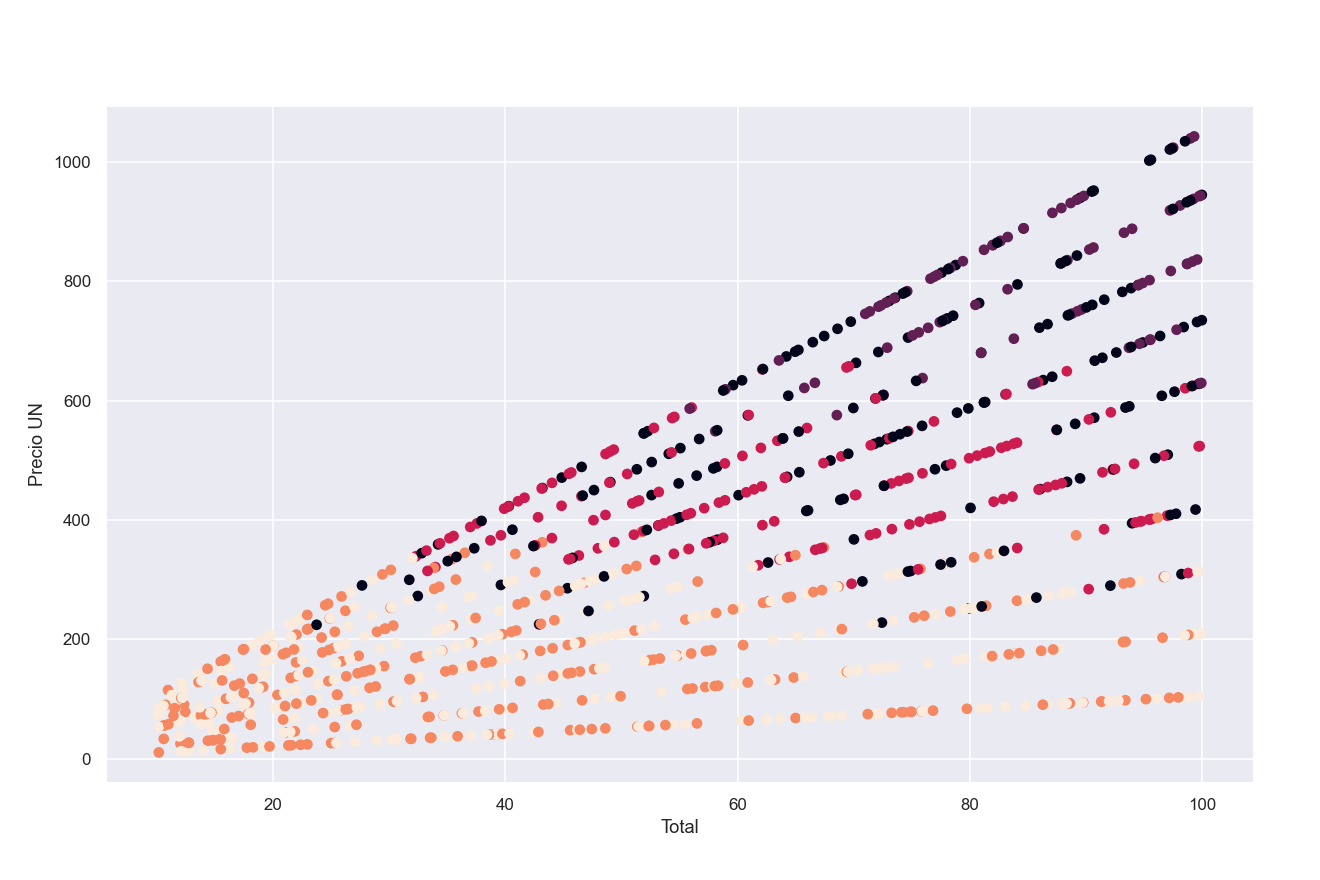

Text(0.5, 0, 'Total')

In [71]:
clusters = fcluster(z, dist_cut, criterion='maxclust')
plt.figure(figsize=(12,8))
plt.scatter(x['unit_price'], x['total'], c=clusters)
plt.ylabel('Precio UN')
plt.xlabel('Total')

# Conclusión

Valor del Accuracy en diferentes modelos:

- KNeighbors Classifier:
    - k = 10  :  62.400 %
    - k = 8   :  62.800 %
    - k = 6   :  64.267 %
- Random Forest Classifier:
    - n_estimators = controlado : 100.000 %
    - n_estimators = 10 : 98.000 %
    - n_estimators = 15 : 99.733 %

En las predicciones realizadas se tiene una buena precisión de aproximadamente del 100 % utilizando el algoritmo de Random Forest, que es bástente bueno para el set de datos. Además aplicar los diferentes estrategias de predicción su consumo de predicción no fue afectada.